In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

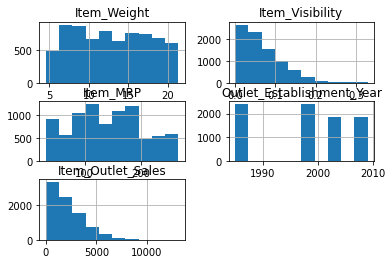

In [5]:
df.hist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:>

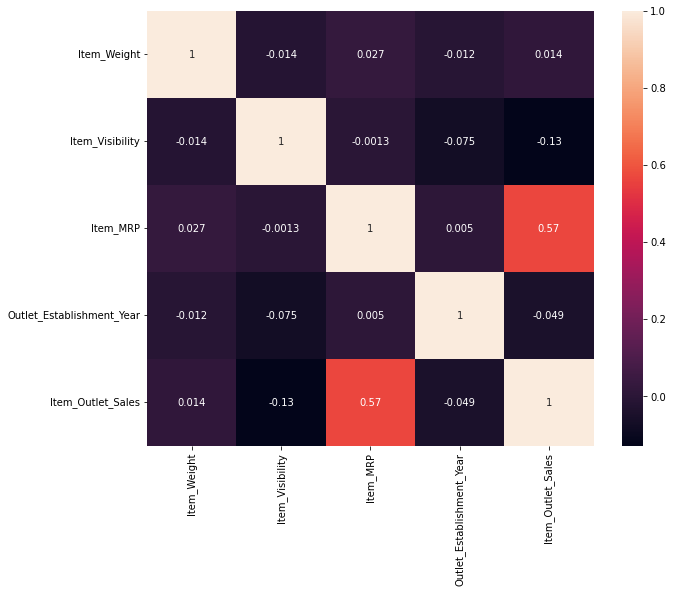

In [7]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True)

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
print("Mean : ",df['Item_Weight'].mean())
print("Median : ",df['Item_Weight'].median())
print("Mode : ",df['Item_Weight'].mode()[0])

Mean :  12.857645184135976
Median :  12.6
Mode :  12.15


In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [11]:
print("Mode : ",df['Outlet_Size'].mode()[0])
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

Mode :  Medium


In [12]:
print("Unique Values in Item_Fat_Content before modification - ",df['Item_Fat_Content'].unique())
df['Item_Type'].unique()

Unique Values in Item_Fat_Content before modification -  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [13]:
df['Item_Fat_Content'].replace(to_replace='low fat', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='reg', value='Regular', inplace=True)

In [14]:
print("Unique Values in Item_Fat_Content after modification - ",df['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after modification -  ['Low Fat' 'Regular']


In [15]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
df['Item_Identifier'] = lb_encoder.fit_transform(df['Item_Identifier'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'DRA12': 0, 'DRA24': 1, 'DRA59': 2, 'DRB01': 3, 'DRB13': 4, 'DRB24': 5, 'DRB25': 6, 'DRB48': 7, 'DRC01': 8, 'DRC12': 9, 'DRC13': 10, 'DRC24': 11, 'DRC25': 12, 'DRC27': 13, 'DRC36': 14, 'DRC49': 15, 'DRD01': 16, 'DRD12': 17, 'DRD13': 18, 'DRD15': 19, 'DRD24': 20, 'DRD25': 21, 'DRD27': 22, 'DRD37': 23, 'DRD49': 24, 'DRD60': 25, 'DRE01': 26, 'DRE03': 27, 'DRE12': 28, 'DRE13': 29, 'DRE15': 30, 'DRE25': 31, 'DRE27': 32, 'DRE37': 33, 'DRE48': 34, 'DRE49': 35, 'DRE60': 36, 'DRF01': 37, 'DRF03': 38, 'DRF13': 39, 'DRF15': 40, 'DRF23': 41, 'DRF25': 42, 'DRF27': 43, 'DRF36': 44, 'DRF37': 45, 'DRF48': 46, 'DRF49': 47, 'DRF51': 48, 'DRF60': 49, 'DRG01': 50, 'DRG03': 51, 'DRG11': 52, 'DRG13': 53, 'DRG15': 54, 'DRG23': 55, 'DRG25': 56, 'DRG27': 57, 'DRG36': 58, 'DRG37': 59, 'DRG39': 60, 'DRG48': 61, 'DRG49': 62, 'DRG51': 63, 'DRH01': 64, 'DRH03': 65, 'DRH11': 66, 'DRH13': 67, 'DRH15': 68, 'DRH23': 69, 'DRH25': 70, 'DRH36': 71, 'DRH37': 72, 'DRH39': 73, 'DRH49': 74, 'DRH51': 75, 'DRH59': 76, 'DRI01':

In [16]:
lb_encoder = LabelEncoder()
df['Item_Fat_Content'] = lb_encoder.fit_transform(df['Item_Fat_Content'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'Low Fat': 0, 'Regular': 1}


In [17]:
lb_encoder = LabelEncoder()
df['Item_Type'] = lb_encoder.fit_transform(df['Item_Type'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}


In [18]:
lb_encoder = LabelEncoder()
df['Outlet_Identifier'] = lb_encoder.fit_transform(df['Outlet_Identifier'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'OUT010': 0, 'OUT013': 1, 'OUT017': 2, 'OUT018': 3, 'OUT019': 4, 'OUT027': 5, 'OUT035': 6, 'OUT045': 7, 'OUT046': 8, 'OUT049': 9}


In [19]:
lb_encoder = LabelEncoder()
df['Outlet_Location_Type'] = lb_encoder.fit_transform(df['Outlet_Location_Type'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}


In [20]:
lb_encoder = LabelEncoder()
df['Outlet_Type'] = lb_encoder.fit_transform(df['Outlet_Type'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}


In [21]:
lb_encoder = LabelEncoder()
df['Outlet_Size'] = lb_encoder.fit_transform(df['Outlet_Size'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'High': 0, 'Medium': 1, 'Small': 2}


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math

In [24]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
def RegressionAlgorithm(func, **kwargs):
    def innerFunction():
        model = func(**kwargs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = math.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean squared error: %.2f" % rmse)
        print('R2 score: %.2f' % r2_score(y_test, y_pred))        
    return innerFunction

In [27]:
from sklearn.linear_model import LinearRegression
RegressionAlgorithm(LinearRegression)()

Root Mean squared error: 1182.38
R2 score: 0.51


In [28]:
from sklearn.linear_model import Ridge
RegressionAlgorithm(Ridge)()

Root Mean squared error: 1182.45
R2 score: 0.51


In [29]:
from sklearn.linear_model import Lasso
RegressionAlgorithm(Lasso)()

Root Mean squared error: 1182.81
R2 score: 0.50


In [30]:
from sklearn.linear_model import ElasticNet
RegressionAlgorithm(ElasticNet)()

Root Mean squared error: 1216.29
R2 score: 0.48


In [31]:
from sklearn.ensemble import RandomForestRegressor
RegressionAlgorithm(RandomForestRegressor,n_estimators=100,max_depth=6,
min_samples_leaf=50,n_jobs=4)()

Root Mean squared error: 1072.96
R2 score: 0.59


In [32]:
from sklearn.svm import LinearSVR
RegressionAlgorithm(LinearSVR, max_iter=10000)()

Root Mean squared error: 1211.20
R2 score: 0.48


In [33]:
from sklearn.neural_network import MLPRegressor
RegressionAlgorithm(MLPRegressor,max_iter=500)()

Root Mean squared error: 1169.18
R2 score: 0.52


In [34]:
from sklearn.tree import DecisionTreeRegressor
RegressionAlgorithm(DecisionTreeRegressor,max_depth=15,min_samples_leaf=300)()

Root Mean squared error: 1109.01
R2 score: 0.56
